In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("forestfires.csv")
for col_name in df.columns:
    print("Total NaN: ", df[col_name].isna().sum())
    print("Total null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print("+"*10)

Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++


In [ ]:
def convert_day(day):
    days = {
        "mon" : 2,
        "tue" : 3,
        "wed" : 4,
        "thu" : 5,
        "fri" : 6,
        "sat" : 7,
        "sun" : 8
    }
    return days.get(day.lower(), -1)

def convert_month(month):
    months = {
        "jan" : 1,
        "feb" : 2,
        "mar" : 3,
        "apr" : 4,
        "may" : 5,
        "jun" : 6,
        "jul" : 7,
        "aug" : 8,
        "sep" : 9,
        "oct" : 10,
        "nov" : 11,
        "dec" : 12
    }
    return months.get(month.lower(), -1)

In [17]:
df["day"] = df["day"].apply(convert_day)
df["month"] = df["month"].apply(convert_month)
print(df)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3    6  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    3  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    7  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3    6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3    8  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8    8  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8    8  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8    8  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8    7  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3     11    3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [22]:
import numpy as np
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

def split(X, y, train_size = 0.8):
    X = np.array(X)
    y = np.array(y)

    num_samples = X.shape[0]
    train_size = int(train_size * num_samples)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.8)

In [36]:
import numpy as np

class LinearRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Khởi tạo mô hình Linear Regression với Gradient Descent.
        """
        self.learning_rate = learning_rate  # Tốc độ học (alpha)
        self.epochs = epochs  # Số vòng lặp tối đa
        self.weights = None  # Trọng số mô hình

    def fit(self, X, y):
        """
        Huấn luyện mô hình trên dữ liệu X, y.
        Args:
            X (numpy.ndarray): Ma trận đặc trưng (features).
            y (numpy.ndarray): Vector đầu ra (labels).
        """
        # Chuyển X, y về numpy array nếu cần
        X = np.array(X)
        y = np.array(y).reshape(-1)  # Đảm bảo y có dạng 1D

        # Thêm cột bias (x_0 = 1) vào X
        X = np.c_[np.ones(X.shape[0]), X]

        # Khởi tạo trọng số ngẫu nhiên nhỏ
        self.weights = np.random.randn(X.shape[1]) * 0.01  

        # Gradient Descent
        m = len(y)  # Số lượng mẫu
        for _ in range(self.epochs):
            y_pred = X.dot(self.weights)  # Dự đoán y
            error = y_pred - y  # Sai số
            gradient = (1/m) * X.T.dot(error)  # Gradient của MSE theo W
            self.weights -= self.learning_rate * gradient  # Cập nhật W

    def predict(self, X):
        """
        Dự đoán giá trị đầu ra dựa trên mô hình đã huấn luyện.
        Args:
            X (numpy.ndarray): Ma trận đặc trưng (features).
        Returns:
            numpy.ndarray: Giá trị dự đoán.
        """
        X = np.array(X)  # Đảm bảo X là numpy array
        X = np.c_[np.ones(X.shape[0]), X]  # Thêm cột bias
        return X.dot(self.weights)  # Trả về giá trị dự đoán


In [40]:
# Tạo mô hình hồi quy tuyến tính tự định nghĩa
model_custom = LinearRegressionCustom(learning_rate=0.001, epochs=5000)

# Huấn luyện mô hình với tập training
model_custom.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model_custom.predict(X_test)  # Thêm dòng này


In [39]:
print("First 10 actual values:", y_test[:10])
print("First 10 predicted values:", y_pred[:10])
print("Min/Max actual:", min(y_test), max(y_test))
print("Min/Max predicted:", min(y_pred), max(y_pred))

First 10 actual values: [  0.     0.   746.28   7.02   0.     2.44   3.05 185.76   0.     6.3 ]
First 10 predicted values: [nan nan nan nan nan nan nan nan nan nan]
Min/Max actual: 0.0 746.28
Min/Max predicted: nan nan


y_test shape: (104,), y_pred shape: (104,)


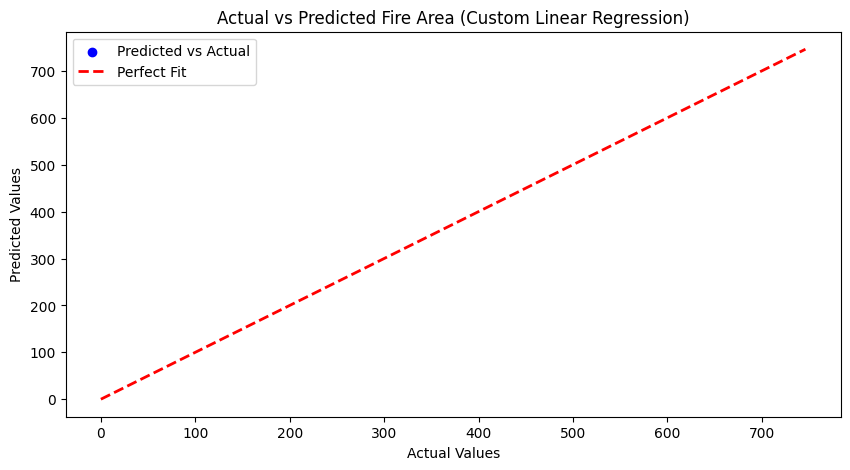

In [42]:
import matplotlib.pyplot as plt

# Đảm bảo y_test là numpy array
if not isinstance(y_test, np.ndarray):
    y_test = y_test.values  # Chuyển từ pandas Series về numpy

# Kiểm tra kích thước dữ liệu trước khi vẽ
print(f"y_test shape: {y_test.shape}, y_pred shape: {y_pred.shape}")

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=1.0, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit")

# Thêm nhãn và tiêu đề
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Fire Area (Custom Linear Regression)")
plt.legend()
plt.show()
